## Sampling

A sample is a random subset of the population. The metrics you obtain when working with a sample are called statistics and are denoted by English letters

It is important to realize that samples may or may not be representative of the larger population they were sampled from, so we must be cautious when making inferences about the entire population based on a sample.

In [1]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load Data:

movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])


# Filter out movie population of interest and remove nulls:
# keeping only movies released after 2000 and before 2020:

df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


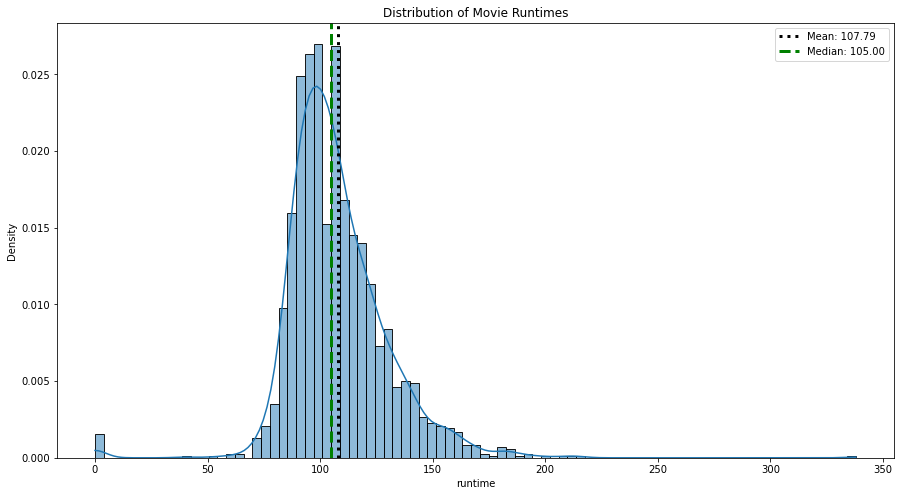

In [3]:
# Visualize the distribution of runtimes:

## Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)

## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(x=data,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Movie Runtimes')

## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend()

For this demonstration, we will take 2 samples of our population. Each sample will consist of 20 randomly selected values.  For reproducibility, we will set the seed for each sample.  For sample A, we will set the seed to 42.  For sample B, we will set the seed to 32. 
For each sample, we will:
    
- calculate descriptive statistics
- create a visual of the distribution
- perform the normality test.


## ***Sample A***

In [5]:
# Sample A:

np.random.seed(42)
n = 20

## sampling 20 values from data without replacement
sampleA = np.random.choice(data, size=n, replace=False)
sampleA

array([164.,  98., 113., 186.,  84., 114., 106.,  91., 125., 117.,  94.,
        90., 152.,  92.,  93.,  85., 116.,  87.,  87., 117.])

In [8]:
# calculate descriptive stats:

sampleA_mean = np.mean(sampleA)
sampleA_med = np.median(sampleA)
sampleA_std = np.std(sampleA)

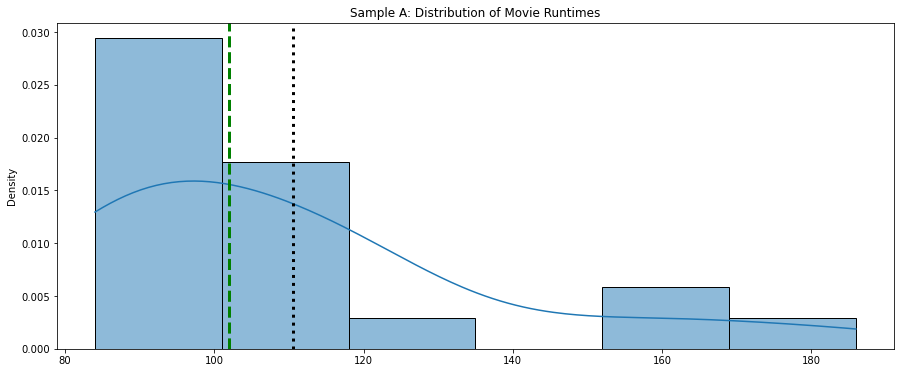

In [9]:
# Visualization for sample A:

# Make figure and plot histogram:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sampleA,kde=True,ax=ax,stat='density')
ax.set_title('Sample A: Distribution of Movie Runtimes')

## Annotate mean and median:
ax.axvline(sampleA_mean, ls=':', color='black', lw=3, label =f"Mean: {sampleA_mean:.2f}")
ax.axvline(sampleA_med,ls='--', color='green', lw=3, label =f"Median: {sampleA_med:.2f}")

In [10]:
# Test for normality:

result = stats.normaltest(sampleA)
print(result)
result.pvalue < .05

NormaltestResult(statistic=9.734874928264695, pvalue=0.00769305377712739)


True

## Sample B

In [12]:
np.random.seed(32)
n = 20

# sampling 20 values from data without replacement:
sampleB = np.random.choice(data, size=n, replace=False)
sampleB

array([125.,  87., 120.,  88., 121.,  90., 125., 109., 106., 165., 100.,
       107.,  91., 107., 129., 132., 100., 132.,  82., 107.])

In [13]:
# calculate stats:

sampleB_mean = np.mean(sampleB)
sampleB_med = np.median(sampleB)
sampleB_std = np.std(sampleB)

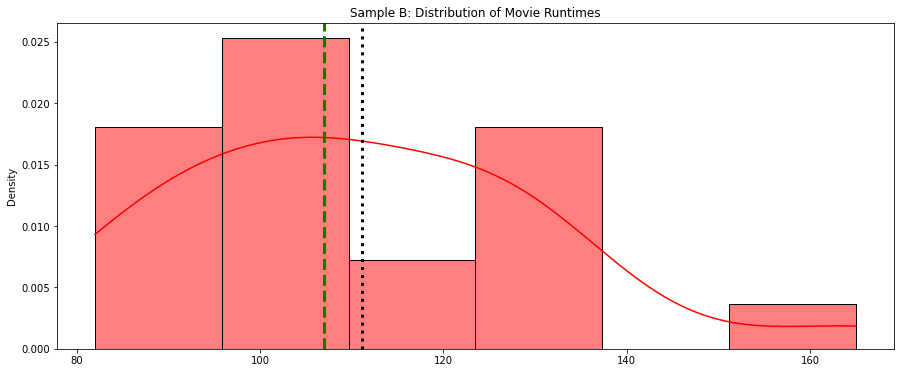

In [15]:
# Make figure and plot histogram:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sampleB,kde=True,ax=ax,stat='density', color = 'red')
ax.set_title('Sample B: Distribution of Movie Runtimes')

# Annotate mean and median:
ax.axvline(sampleB_mean, ls=':', color='black', lw=3, label =f"Mean: {sampleB_mean:.2f}")
ax.axvline(sampleB_med,ls='--', color='green', lw=3, label =f"Median: {sampleB_med:.2f}")

In [16]:
# Normality Test:

result = stats.normaltest(sampleB)
print(result)
result.pvalue < .05

NormaltestResult(statistic=3.879444116188468, pvalue=0.14374389667857196)


False

In [19]:
# Now, take a sample of 100 movies and repeat the calculations and visualizations as we did above.:

np.random.seed(32)
n = 100

# sampling 100 values from data without replacement:
sample = np.random.choice(data, size=n, replace=False)

# calc stats:
samp_mean = np.mean(sample)
samp_med = np.median(sample)
samp_std = np.std(sample)

#Set the range and spacing for the x-axis:
x_range = np.linspace( np.min(data), np.max(data), num=10000)

#Define x scale, mean and std for the normal curve to be plotted:
pdf = stats.norm.pdf(x_range, loc=np.mean(data),
                     scale = np.std(data))

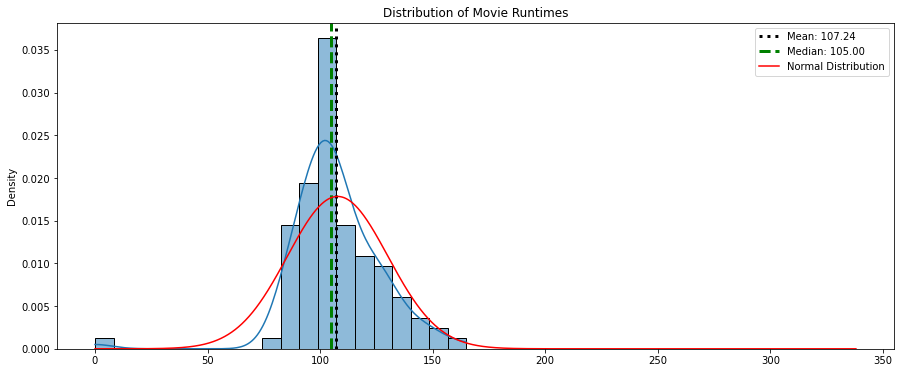

In [20]:
## Make figure and plot histogram:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Movie Runtimes')

## Annotate mean and median:
ax.axvline(samp_mean, ls=':', color='black', lw=3, label =f"Mean: {samp_mean:.2f}")
ax.axvline(samp_med,ls='--', color='green', lw=3, label =f"Median: {samp_med:.2f}")

## Add pdf for normal curve:
ax.plot(x_range, pdf,color='red',label='Normal Distribution')
ax.legend()

In [21]:
result = stats.normaltest(sample)
print(result)
result.pvalue < .05

NormaltestResult(statistic=37.233728564765755, pvalue=8.218613776872242e-09)


True